In [51]:
from qwak.qwak import QWAK

In [52]:
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt
from math import sqrt, ceil, pow
import scipy.special as sp
from scipy.linalg import expm

In [53]:
def stream_path(n,alpha):
    B = np.matrix(np.zeros((n,n), dtype='complex'))
    for x in range(n-1):
        B[x,x+1] = np.exp(1j*alpha)
    
    return B + B.H

def inf_line_bessel(x0,nx,t,alpha):
    domain = np.arange(x0 - nx, x0 + nx + 1)
    psi = np.zeros([2*nx + 1,1], dtype='complex')
    
    for x in range(2*nx + 1):
        psi[x,0] = 1j**(np.abs(domain[x]-x0))*sp.jv(np.abs(domain[x] - x0), 2*t)/np.sqrt(2)
        psi[x,0] += 1j**(np.abs(domain[x]-x0-1))*sp.jv(np.abs(domain[x] - x0 - 1), 2*t)/np.sqrt(2)
        
    return np.abs(np.array(psi))**2

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


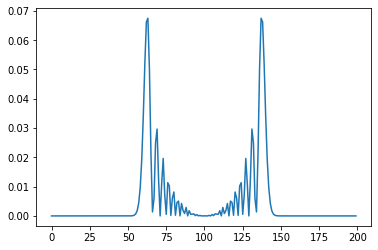

In [58]:
n=200
x0 = 0
n1 = 100
t  = 20
alpha=np.pi/2
# print(stream_path(n,alpha))
# print()
H = nx.path_graph(n,create_using=nx.DiGraph)
G = H.reverse()

for u,v,d in H.edges(data=True):
    d["weight"] = np.exp(1j*alpha)
    mat = np.matrix(d["weight"])

for u,v,d in G.edges(data=True):
    d["weight"] = np.exp(-1j*alpha)
    mat = np.matrix(d["weight"])

graph = nx.compose(H,G)

qw2 = QWAK(graph)
qw2.runWalk(20,[n//2-1,n//2 +1])
plt.plot(qw2.getProbDistVec())
# print(qw2.getAdjacencyMatrix())
# print()
print(np.matrix(qw2.getAdjacencyMatrix()).round(decimals=0) == np.matrix(stream_path(n,alpha)).round(decimals=0))

# psi_bessel = inf_line_bessel(x0,n1,t,alpha)
# plt.plot(psi_bessel)

In [68]:
def inf_line_bessel_oriented(x0,nx,t,alpha):
    domain = np.arange(x0 - nx, x0 + nx + 1)
    psi = np.zeros([2*nx + 1,1], dtype='complex')

    for x in range(2*nx + 1):
        psi[x,0] = (np.exp(-1j*alpha/2))*1j**(np.abs(domain[x]+x0))*sp.jv(np.abs(domain[x] + x0), 2*t)/np.sqrt(2)
        psi[x,0] += (np.exp(1j*alpha/2))*1j**(np.abs(domain[x]-x0))*sp.jv(np.abs(domain[x] - x0), 2*t)/np.sqrt(2)

    return np.abs(np.array(psi))**2

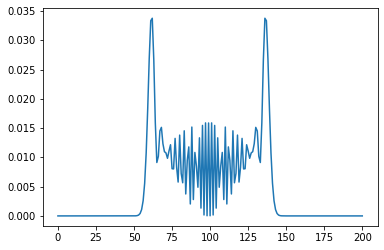

In [69]:
x0 = 1
n0 = 100
t  = 20
alpha=np.pi/2

psi_oriented = inf_line_bessel_oriented(x0,n0,t,alpha)
plt.plot(psi_oriented)